In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [235]:
import sqlite3

# Connect to the database
conn = sqlite3.connect('/Users/amitmishra/Downloads/database.sqlite')

# Create a cursor object to execute SQL commands
cursor = conn.cursor()

# Get a list of all table names in the database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
table_names = cursor.fetchall()

# Print the table names
for table in table_names:
    print(table[0])

tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)

sqlite_sequence
Player_Attributes
Player
Match
League
Country
Team
Team_Attributes


In [236]:
table_names

[('sqlite_sequence',),
 ('Player_Attributes',),
 ('Player',),
 ('Match',),
 ('League',),
 ('Country',),
 ('Team',),
 ('Team_Attributes',)]

In [237]:
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


The basic structure of the query is very simple: You define what you want to see after the SELECT, * means all possible columns You choose the table after the FROM You add the conditions for the data you want to use from the table(s) after the WHERE

The stracture, and the order of the sections matter, while spaces, new lines, capital words and indentation are there to make the code easier to read.

In [238]:
countries = pd.read_sql("""SELECT * FROM Country;""", conn)
countries

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [239]:
players = pd.read_sql("""SELECT * FROM player;""", conn)

In [240]:
players.head(2)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146


In [241]:
team = pd.read_sql("""SELECT * FROM team;""",conn)
team_attributes = pd.read_sql("""SELECT * FROM Team_Attributes;""",conn)

In [242]:
team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [243]:
team_attributes.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [244]:
team_attributes.columns

Index(['id', 'team_fifa_api_id', 'team_api_id', 'date', 'buildUpPlaySpeed',
       'buildUpPlaySpeedClass', 'buildUpPlayDribbling',
       'buildUpPlayDribblingClass', 'buildUpPlayPassing',
       'buildUpPlayPassingClass', 'buildUpPlayPositioningClass',
       'chanceCreationPassing', 'chanceCreationPassingClass',
       'chanceCreationCrossing', 'chanceCreationCrossingClass',
       'chanceCreationShooting', 'chanceCreationShootingClass',
       'chanceCreationPositioningClass', 'defencePressure',
       'defencePressureClass', 'defenceAggression', 'defenceAggressionClass',
       'defenceTeamWidth', 'defenceTeamWidthClass',
       'defenceDefenderLineClass'],
      dtype='object')

In [245]:
team_stats = pd.read_sql("""SELECT Team_Attributes.buildUpPlaySpeed AS speed, Team_Attributes.buildUpPlayDribbling AS dribbling,
                            Team_Attributes.buildUpPlayPassing AS passing,
                            Team_Attributes.chanceCreationPassing AS chancepassing, 
                            Team_Attributes.defencePressure AS pressure,
                            Team_Attributes.defenceAggression AS aggression, Team.team_long_name AS club
                            FROM Team_Attributes JOIN Team
                            ON Team_Attributes.team_api_id = Team. team_api_id;""",conn)

In [246]:
team_stats.head()

,speed,dribbling,passing,chancepassing,pressure,aggression,club
0,60,NaN,50,60,50,55,FC Aarau
1,52,48.0,56,54,47,44,FC Aarau
2,47,41.0,54,54,47,44,FC Aarau
3,70,NaN,70,70,60,70,Aberdeen
4,47,NaN,52,53,47,47,Aberdeen


In [247]:
team_stats.shape

(1458, 7)

In [248]:
totalteams = team["team_long_name"].unique().tolist()
totalteams = pd.DataFrame(totalteams)
totalteams.shape

(296, 1)

In [249]:
#So we have a total of 296 teams

In [250]:
team_stats.loc[team_stats["club"] == "Manchester City"]

,speed,dribbling,passing,chancepassing,pressure,aggression,club
800,70,NaN,60,55,45,55,Manchester City
801,70,NaN,60,70,65,65,Manchester City
802,45,NaN,55,40,50,60,Manchester City
803,36,NaN,34,39,42,44,Manchester City
804,59,35.0,29,32,42,44,Manchester City
805,59,35.0,29,38,48,47,Manchester City


In [251]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Perform aggregation by club, calculating means for numerical columns
aggregated_data = team_stats.groupby('club').mean()

# Handle missing values (impute with mean in this example)
imputer = SimpleImputer(strategy='mean')
aggregated_data_imputed = imputer.fit_transform(aggregated_data)
aggregated_data_imputed




array([[51.16666667, 51.        , 51.66666667, 47.16666667, 46.83333333,
        52.83333333],
       [57.33333333, 50.        , 61.16666667, 55.16666667, 45.        ,
        51.16666667],
       [45.33333333, 60.        , 47.5       , 50.5       , 43.33333333,
        50.5       ],
       ...,
       [54.        , 51.        , 40.        , 56.5       , 44.        ,
        47.        ],
       [52.        , 43.        , 50.6       , 51.6       , 46.6       ,
        53.2       ],
       [50.66666667, 54.        , 47.        , 52.16666667, 40.66666667,
        43.83333333]])

In [252]:
aggregated_data.isna().sum()

speed             0
dribbling        25
passing           0
chancepassing     0
pressure          0
aggression        0
dtype: int64

In [253]:
aggregated_data = aggregated_data.fillna(aggregated_data.mean())
aggregated_data.isna().sum()

speed            0
dribbling        0
passing          0
chancepassing    0
pressure         0
aggression       0
dtype: int64

In [254]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(aggregated_data)
scaled_data

array([[-0.11318855,  0.29240335,  0.40666682, -0.69612246,  0.14453298,
         0.60013317],
       [ 0.68926759,  0.17333542,  1.7035969 ,  0.51771962, -0.11882703,
         0.32890267],
       [-0.87226869,  1.36401468, -0.16216217, -0.19035493, -0.35824521,
         0.22041047],
       ...,
       [ 0.25550752,  0.29240335, -1.18605434,  0.72002663, -0.26247794,
        -0.34917358],
       [-0.00474853, -0.66014006,  0.2610466 , -0.02345164,  0.11101443,
         0.65980388],
       [-0.17825256,  0.64960713, -0.23042164,  0.06252884, -0.74131432,
        -0.86451153]])

In [255]:
scaled_data = pd.DataFrame(scaled_data);scaled_data

,0,1,2,3,4,5
0,-0.113189,0.292403,0.406667,-0.696122,0.144533,0.600133
1,0.689268,0.173335,1.703597,0.517720,-0.118827,0.328903
2,-0.872269,1.364015,-0.162162,-0.190355,-0.358245,0.220410
3,1.274844,-0.005266,0.383914,0.188971,0.958555,2.173270
4,1.057964,1.006811,0.019863,-0.215643,-1.148325,0.220410
...,...,...,...,...,...,...
280,-0.590325,0.000000,-0.639979,-0.986939,0.204388,0.545887
281,-1.358080,0.054267,-0.530763,-0.266220,1.777365,0.464518
282,0.255508,0.292403,-1.186054,0.720027,-0.262478,-0.349174
283,-0.004749,-0.660140,0.261047,-0.023452,0.111014,0.659804


In [256]:
# Apply K-means clustering
num_clusters = 5  
kmeans = KMeans(n_clusters=num_clusters)
cluster_labels = kmeans.fit_predict(scaled_data)

# Add the cluster labels back to the aggregated DataFrame
aggregated_data['cluster'] = cluster_labels

# Print or visualize the results
print(aggregated_data)

                              speed  dribbling    passing  chancepassing  \
club                                                                       
1. FC Kaiserslautern      51.166667  51.000000  51.666667      47.166667   
1. FC Köln                57.333333  50.000000  61.166667      55.166667   
1. FC Nürnberg            45.333333  60.000000  47.500000      50.500000   
1. FSV Mainz 05           61.833333  48.500000  51.500000      53.000000   
AC Ajaccio                60.166667  57.000000  48.833333      50.333333   
...                             ...        ...        ...            ...   
Xerez Club Deportivo      47.500000  48.544231  44.000000      45.250000   
Zagłębie Lubin            41.600000  49.000000  44.800000      50.000000   
Zawisza Bydgoszcz         54.000000  51.000000  40.000000      56.500000   
Évian Thonon Gaillard FC  52.000000  43.000000  50.600000      51.600000   
Śląsk Wrocław             50.666667  54.000000  47.000000      52.166667   

           

In [257]:
aggregated_data

,speed,dribbling,passing,chancepassing,pressure,aggression,cluster
club,,,,,,,
1. FC Kaiserslautern,51.166667,51.000000,51.666667,47.166667,46.833333,52.833333,2
1. FC Köln,57.333333,50.000000,61.166667,55.166667,45.000000,51.166667,0
1. FC Nürnberg,45.333333,60.000000,47.500000,50.500000,43.333333,50.500000,2
1. FSV Mainz 05,61.833333,48.500000,51.500000,53.000000,52.500000,62.500000,0
AC Ajaccio,60.166667,57.000000,48.833333,50.333333,37.833333,50.500000,2
...,...,...,...,...,...,...,...
Xerez Club Deportivo,47.500000,48.544231,44.000000,45.250000,47.250000,52.500000,3
Zagłębie Lubin,41.600000,49.000000,44.800000,50.000000,58.200000,52.000000,3
Zawisza Bydgoszcz,54.000000,51.000000,40.000000,56.500000,44.000000,47.000000,1


In [258]:
mydata = aggregated_data[(aggregated_data["cluster"]==1)]
mydata

,speed,dribbling,passing,chancepassing,pressure,aggression,cluster
club,,,,,,,
Atlético Madrid,53.166667,51.000000,47.833333,64.666667,55.500000,39.166667,1
CD Nacional,46.666667,59.000000,38.666667,55.333333,41.166667,44.833333,1
CD Tenerife,49.500000,50.000000,48.750000,56.250000,52.750000,45.000000,1
Eintracht Braunschweig,64.750000,52.000000,56.000000,58.750000,49.500000,44.000000,1
FC Arouca,67.000000,66.000000,39.000000,55.000000,36.000000,38.000000,1
FC Basel,55.000000,63.000000,44.833333,60.833333,47.666667,57.500000,1
FC Porto,51.000000,50.000000,48.666667,55.666667,53.333333,50.333333,1
FC Schalke 04,55.833333,48.500000,47.000000,56.166667,50.166667,54.000000,1
FC Sion,54.333333,57.000000,44.000000,60.833333,42.666667,43.833333,1


In [259]:
mydata = aggregated_data[(aggregated_data["cluster"]==4)]
mydata

,speed,dribbling,passing,chancepassing,pressure,aggression,cluster
club,,,,,,,
AC Arles-Avignon,43.166667,47.000000,53.166667,46.000000,38.333333,46.000000,4
Académica de Coimbra,42.500000,53.000000,42.666667,53.333333,40.333333,37.833333,4
Bari,51.166667,40.000000,49.000000,48.833333,48.000000,45.500000,4
Brescia,36.833333,56.000000,38.000000,43.333333,41.333333,46.000000,4
CF Os Belenenses,44.333333,53.000000,44.666667,46.000000,35.333333,42.000000,4
CS Marítimo,44.000000,49.000000,46.666667,58.666667,38.333333,44.500000,4
Cesena,58.666667,30.000000,41.000000,46.500000,39.500000,46.166667,4
Córdoba CF,40.333333,46.500000,46.333333,41.666667,36.833333,38.333333,4
De Graafschap,33.500000,48.544231,40.500000,45.000000,47.000000,44.000000,4


In [260]:
mydata = aggregated_data[(aggregated_data["cluster"]==3)]
mydata

,speed,dribbling,passing,chancepassing,pressure,aggression,cluster
club,,,,,,,
ADO Den Haag,45.500000,43.500000,50.000000,49.666667,45.500000,51.333333,3
AS Nancy-Lorraine,49.333333,48.000000,45.166667,50.500000,46.166667,51.500000,3
AZ,51.666667,42.000000,42.666667,54.333333,50.000000,55.333333,3
Ajax,35.166667,41.500000,33.833333,50.666667,59.833333,53.833333,3
Arka Gdynia,38.000000,48.544231,41.000000,39.000000,56.000000,59.000000,3
Arsenal,52.333333,51.000000,31.166667,34.666667,50.500000,46.500000,3
Atalanta,55.333333,45.000000,41.666667,42.000000,42.666667,51.500000,3
Athletic Club de Bilbao,51.666667,43.500000,48.000000,46.666667,39.666667,62.333333,3
Beerschot AC,46.000000,48.544231,41.500000,46.000000,48.250000,49.000000,3


In [275]:
Sum_of_squared_distances = []

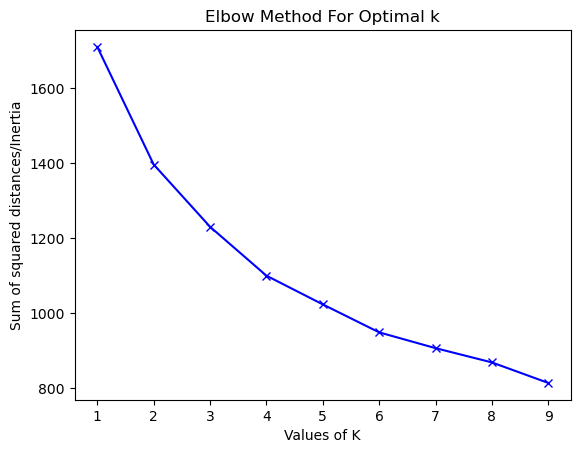

In [276]:
K = range(1,10)
for num_clusters in K:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(scaled_data)
    Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,"bx-")
plt.xlabel("Values of K") 
plt.ylabel("Sum of squared distances/Inertia") 
plt.title("Elbow Method For Optimal k")
plt.show()

Silhouette score for num_clusters: 3 is = 0.14479476870993077
Silhouette score for num_clusters: 4 is = 0.1471426369053612
Silhouette score for num_clusters: 5 is = 0.14512459376017492
Silhouette score for num_clusters: 6 is = 0.13902422833634226
Silhouette score for num_clusters: 7 is = 0.14009577939622664
Silhouette score for num_clusters: 8 is = 0.14277536420764578


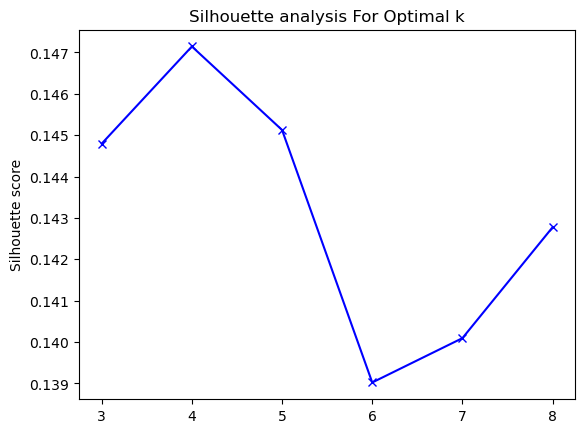

In [278]:
range_n_clusters = [3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(scaled_data)
    cluster_labels = kmeans.labels_
 
    # silhouette score
    sscore = silhouette_score(scaled_data, cluster_labels)
    silhouette_avg.append(sscore)
    print("Silhouette score for num_clusters: {} is = {}".format(num_clusters,sscore))
plt.plot(range_n_clusters,silhouette_avg,"bx-")
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()